# Find and Visualize clusters with K-Means 


### 1. Load and Inspect data

In [1]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [2]:
# Upload your data as a csv file and load it as a data frame 
df = pd.read_csv('penguins.csv').dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.describe(include=['O'])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


### 2. Preprocess

Check for Null values

In [6]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Check for duplicates

In [7]:
df.duplicated().sum()

0

Dummy Encoding

In [8]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,1,0,0,0
340,46.8,14.3,215.0,4850.0,0,1,0,0,0
341,50.4,15.7,222.0,5750.0,0,1,0,0,1
342,45.2,14.8,212.0,5200.0,0,1,0,0,0


### 3. EDA

In [9]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_Male'],
      dtype='object')

Distributions

<Figure size 1800x800 with 0 Axes>

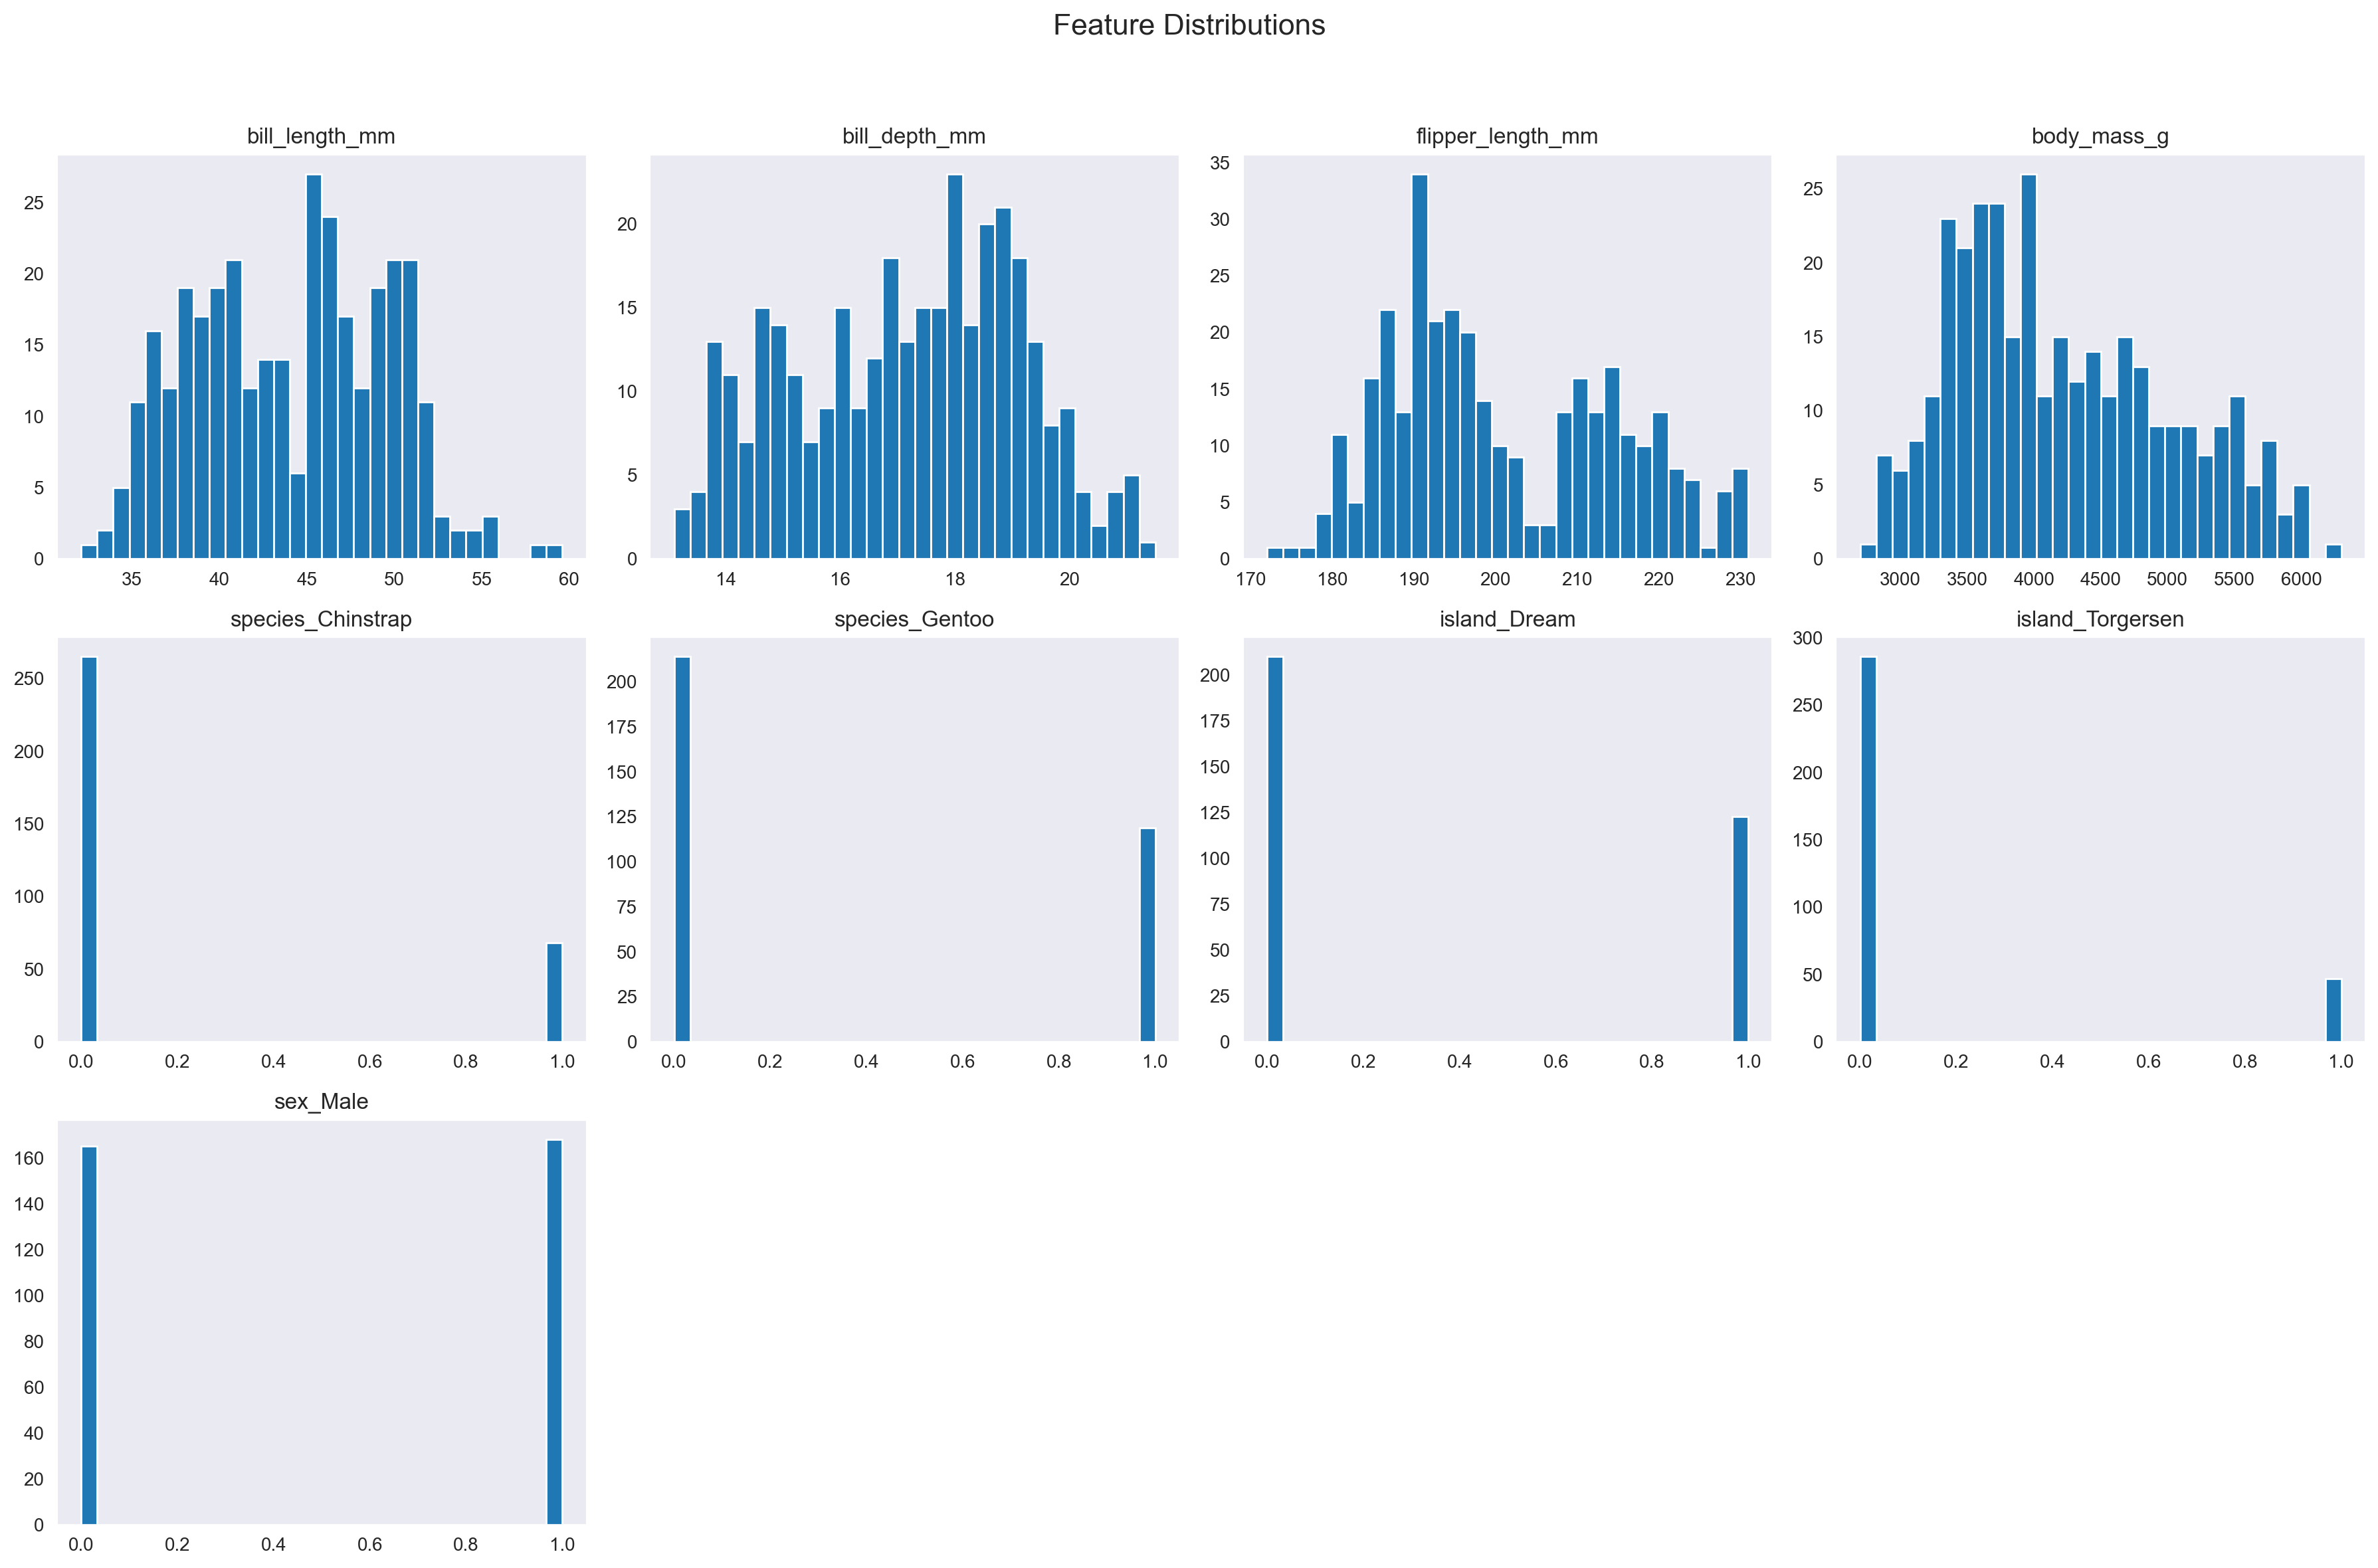

In [10]:
plt.figure(figsize=(18, 8))

# Plot histograms for all features in a 2x4 grid
df[df.columns].hist(bins=30, layout=(3, 4), figsize=(18, 12), grid=False)

plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


Pariplot

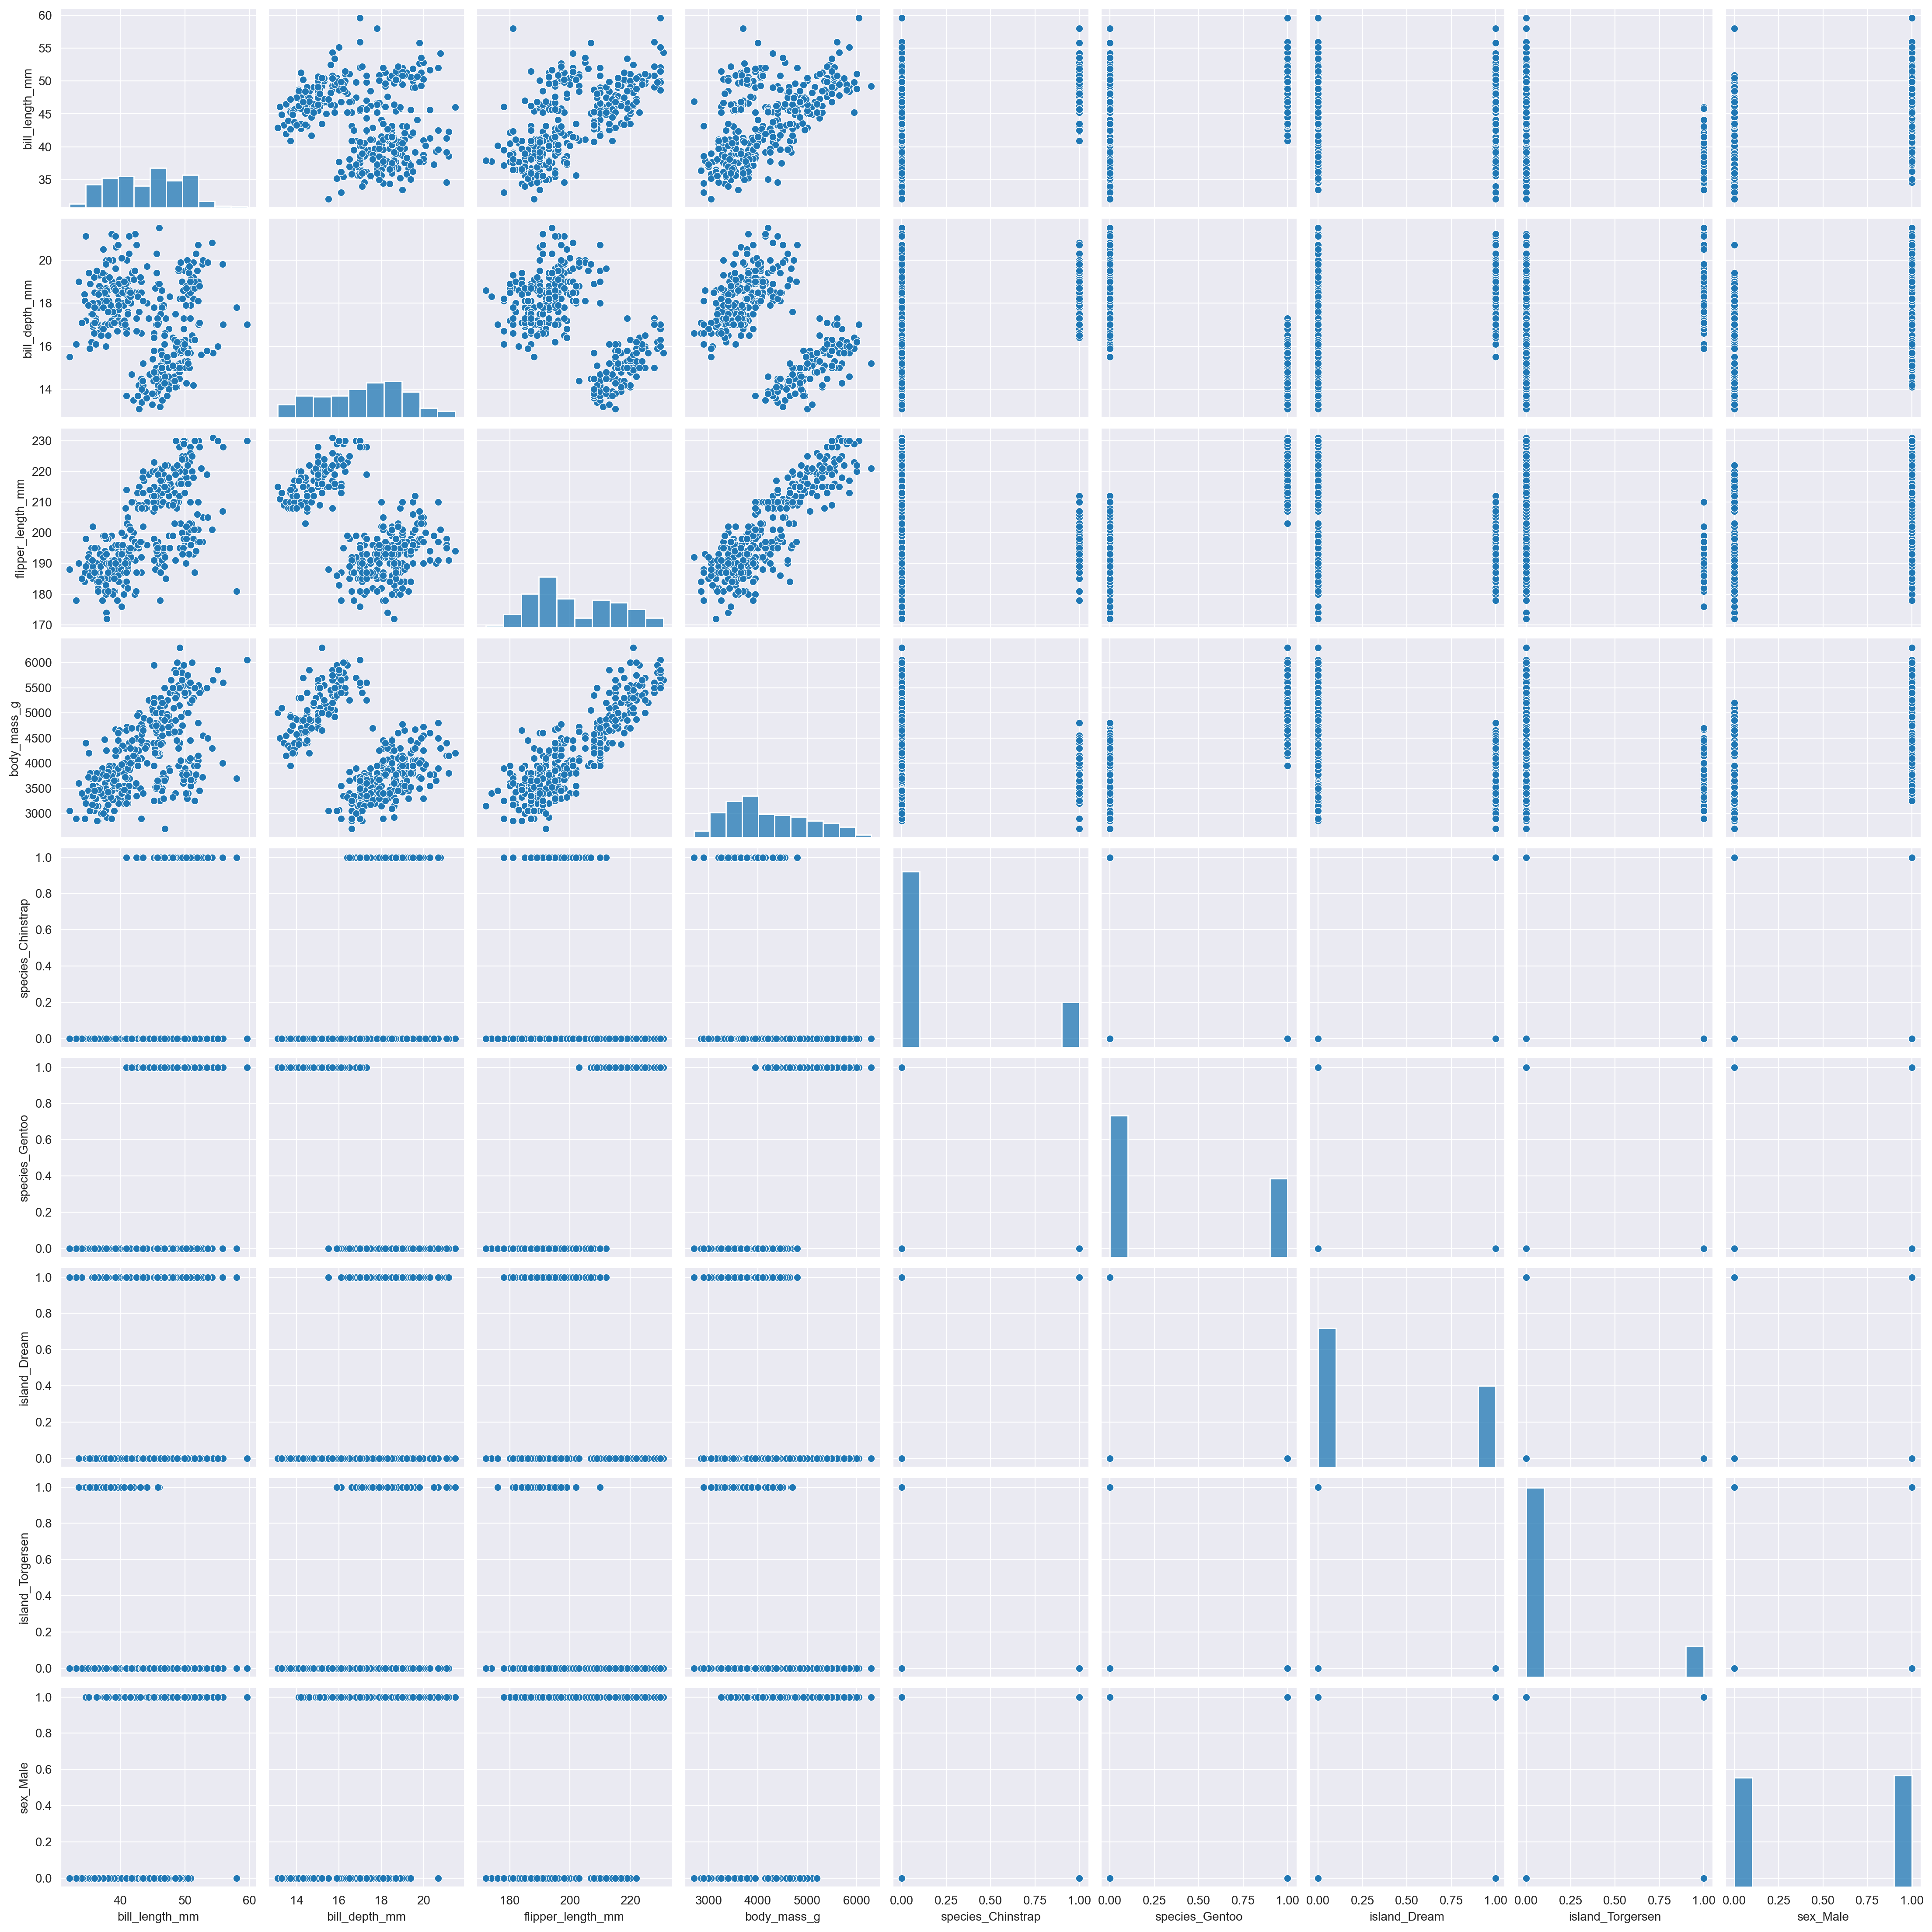

In [11]:
import seaborn as sns 
sns.pairplot(df)
plt.show()

### 4. Model Training

In [12]:
# Choose the variable names

X = np.array(df.loc[:,['bill_length_mm', 'bill_depth_mm']]).reshape(-1, 2)

In [13]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 42)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)

#### Elbow Curve

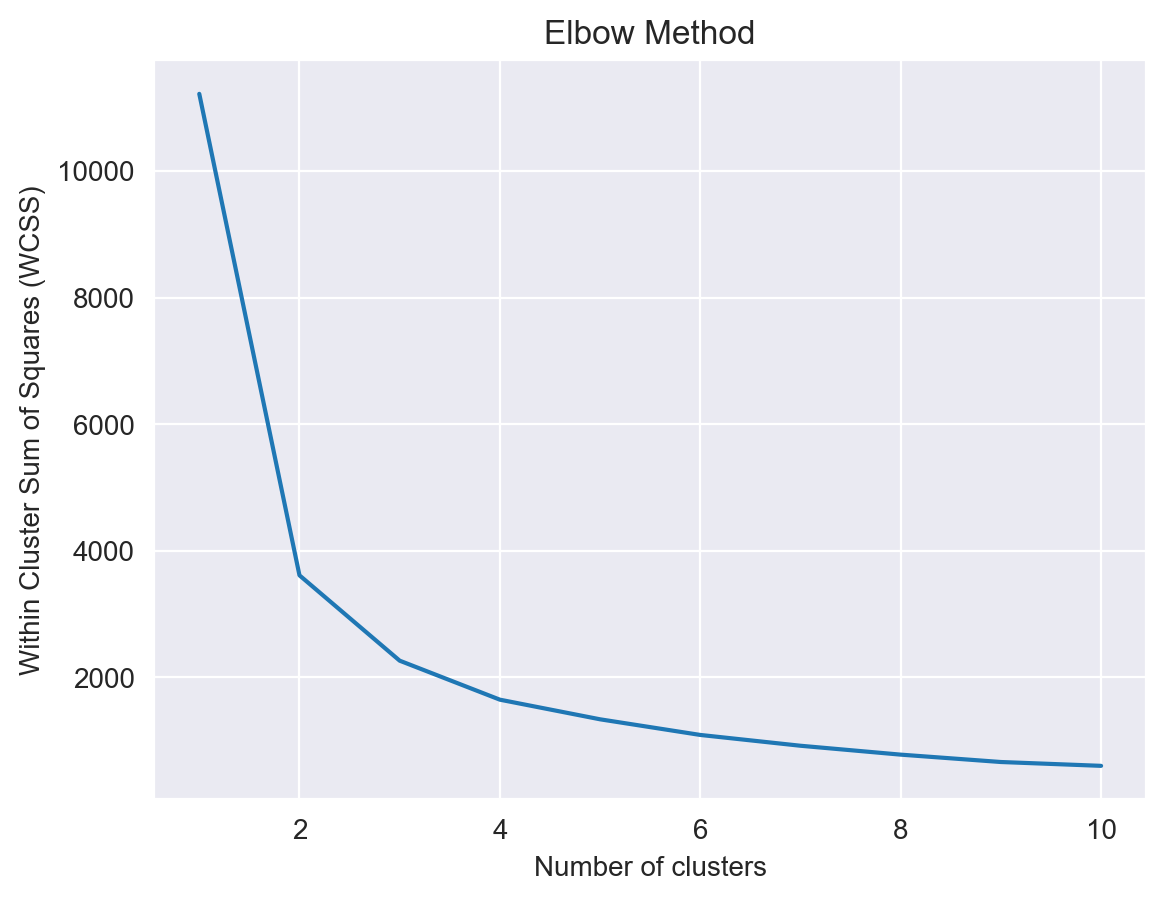

In [14]:
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

#### Centriods

In [15]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)




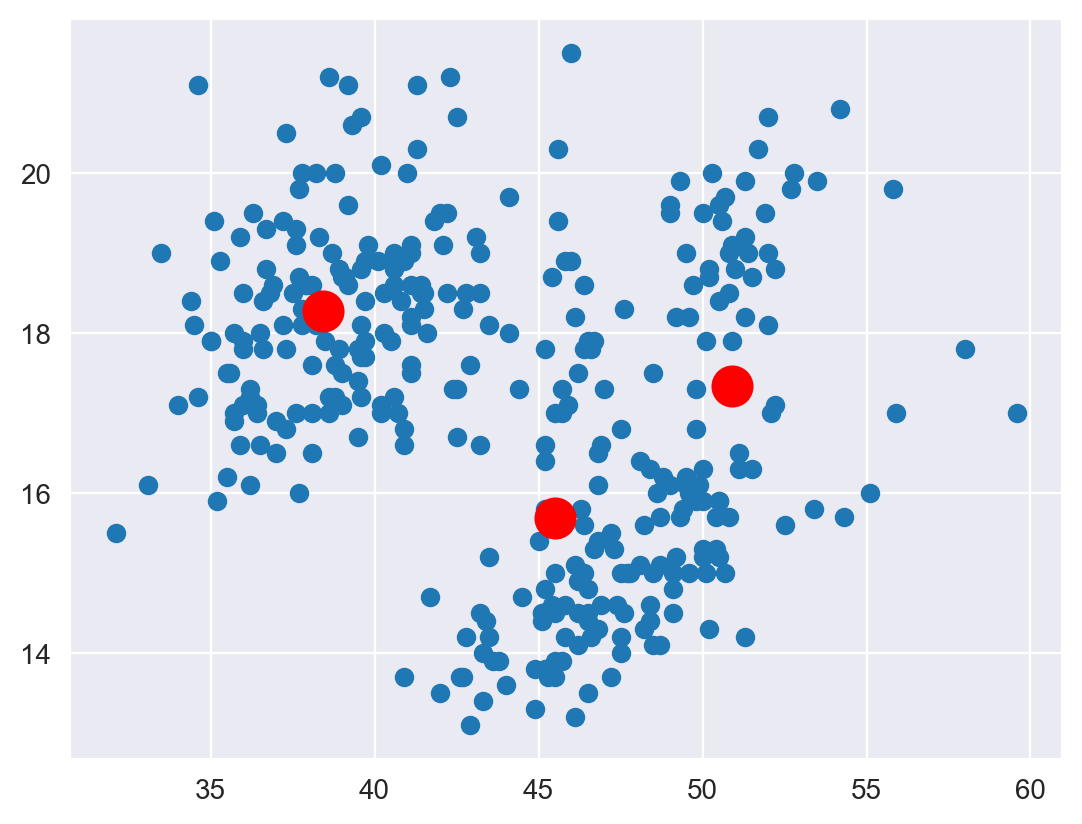

In [16]:
# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

### End of Notebook